In [1]:
import numpy as np
import matplotlib.pyplot as plt

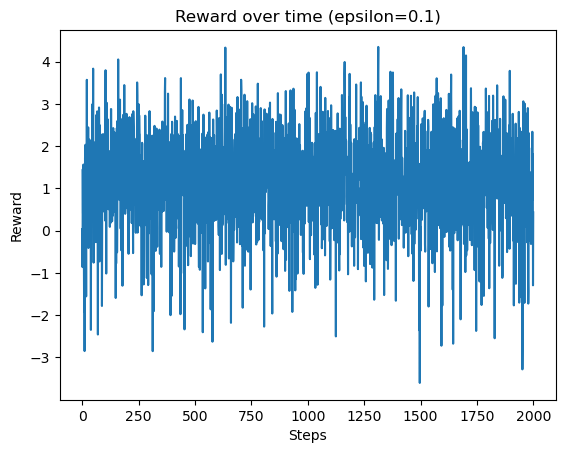

In [2]:
#Exercice 1 question numero 7
#Implement a bandit algorithm and plot the curve of the reward as a function of the number of steps
k = 10
true_action_value = np.random.normal(0, 1, k)
optimal_action = np.argmax(true_action_value)
q_value = np.zeros(k)

def get_reward(action: int):
    return np.random.normal(true_action_value[action], 1)

def epsilon_greedy(epsilon):
    if np.random.rand() < epsilon:
        return np.random.choice(k)
    else:
        return np.argmax(q_value)

def bandit():
    steps = 2000
    rewards = np.zeros(steps)
    action_count = np.zeros(k)
    epsilon = 0.1

    for j in range(steps):
        action = epsilon_greedy(epsilon)
        reward = get_reward(action)
        action_count[action] += 1
        q_value[action] += (reward - q_value[action]) / action_count[action]
        rewards[j] += reward

    plt.plot(range(steps), rewards)
    plt.xlabel("Steps")
    plt.ylabel("Reward")
    plt.title("Reward over time (epsilon=0.1)")
    plt.show()

bandit()

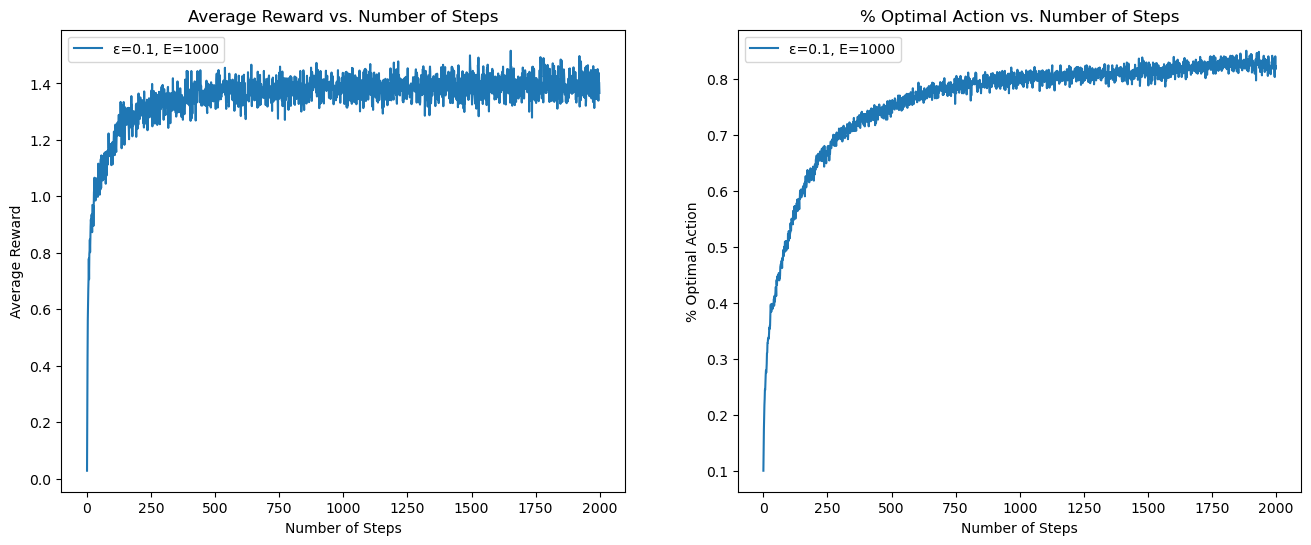

In [3]:
#Exercice 1 question numero 8
#Plotting the curve once of the average reward across multiple runs as a function of the number of steps
#and another of the percentage of performing optimal actions across multiple runs as a function of the number of steps

#redefine the policy function
def epsilon_greedy(epsilon, action_values):
    if np.random.rand() < epsilon:
        return np.random.randint(0, len(action_values))
    else:
        return np.argmax(action_values)

#redefine the reward function
def get_reward(action, true_action_value):
    return np.random.normal(true_action_value[action], 1)

#runs and plots
def bandit_multiple_runs():
    k = 10
    steps = 2000
    epsilon = 0.1
    nb_run = 1000

    average_rewards = np.zeros(steps)
    optimal_actions = np.zeros(steps)

    for i in range(nb_run):
        true_action_value = np.random.normal(0, 1, k)
        action_count = np.zeros(k)
        action_values = np.zeros(k)
        optimal_action = np.argmax(true_action_value)

        for j in range(steps):
            action = epsilon_greedy(epsilon, action_values)
            reward = get_reward(action, true_action_value)

            action_count[action] += 1
            action_values[action] += (reward - action_values[action]) / action_count[action]

            average_rewards[j] += reward / nb_run
            if action == optimal_action:
                optimal_actions[j] += 1 / nb_run

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))
    axs[0].plot(range(steps), average_rewards, label=f"ε={epsilon}, E={nb_run}")
    axs[0].set_title('Average Reward vs. Number of Steps')
    axs[0].set_xlabel('Number of Steps')
    axs[0].set_ylabel('Average Reward')
    axs[0].legend()

    axs[1].plot(range(steps), optimal_actions, label=f"ε={epsilon}, E={nb_run}")
    axs[1].set_title('% Optimal Action vs. Number of Steps')
    axs[1].set_xlabel('Number of Steps')
    axs[1].set_ylabel('% Optimal Action')
    axs[1].legend()

    plt.show()
bandit_multiple_runs()